# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:03:28+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:



ta = '2022-11-07 10:25:50+01:00' #tiempo inicial
tb = '2022-11-07 12:37:15+01:00' #tiempo final


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity             voltage    current        pf  frequency  \
type                                                                    
2022-11-07 10:25:50+01:00  242.899002   0.130042  0.528653  50.006420   
2022-11-07 10:26:00+01:00  242.737503   0.133094  0.520348  50.001747   
2022-11-07 10:26:10+01:00  242.697678   0.129000  0.530819  49.997543   
2022-11-07 10:26:20+01:00  235.166763  16.608639  0.934925  49.995106   
2022-11-07 10:26:30+01:00  235.391174  17.667961  0.977958  49.998772   
...                               ...        ...       ...        ...   
2022-11-07 12:02:40+01:00  238.002716  11.187044  0.999865  49.956417   
2022-11-07 12:02:50+01:00  237.987183  11.177576  0.999881  49.951290   
2022-11-07 12:03:00+01:00  237.906784  11.169724  0.999888  49.946812   
2022-11-07 12:03:10+01:00  237.692657  11.156882  0.999886  49.945564   
2022-11-07 12:03:20+01:00  237.956955  11.164680  0.999890  49.948425   

physical_quantity                power                           
type                          apparent       active    reactive  
2022-11-07 10:25:50+01:00    17.785526    16.687590   -6.134834  
2022-11-07 10:26:00+01:00    17.764444    16.608681   -6.259930  
2022-11-07 10:26:10+01:00    17.681017    16.609272   -6.048691  
2022-11-07 10:26:20+01:00  3793.162109  3735.966064  590.130432  
2022-11-07 10:26:30+01:00  4095.604004  4067.212646  481.278076  
...                                ...          ...         ...  
2022-11-07 12:02:40+01:00  2662.208984  2662.187744   10.577063  
2022-11-07 12:02:50+01:00  2659.826660  2659.804688   10.842072  
2022-11-07 12:03:00+01:00  2657.079346  2657.056885   10.894663  
2022-11-07 12:03:10+01:00  2651.628906  2651.606445   10.887830  
2022-11-07 12:03:20+01:00  2656.445312  2656.424316   10.767763  

[586 rows x 7 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:

ta = '2022-11-07 10:25:50+01:00' #tiempo inicial
tb = '2022-11-07 12:37:15+01:00' #tiempo final


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity             voltage    current        pf  frequency  \
type                                                                    
2022-11-07 10:25:50+01:00  243.005997   0.133669  0.533487  50.006302   
2022-11-07 10:26:00+01:00  242.768997   0.127814  0.537486  50.005642   
2022-11-07 10:26:10+01:00  242.720398   0.131656  0.530181  49.997860   
2022-11-07 10:26:20+01:00  240.556992   6.202380  0.653927  49.996620   
2022-11-07 10:26:30+01:00  235.507996  17.680960  0.977315  49.993740   
...                               ...        ...       ...        ...   
2022-11-07 12:02:40+01:00  237.970001  11.191120  0.999862  49.953800   
2022-11-07 12:02:50+01:00  237.992599  11.177580  0.999870  49.957821   
2022-11-07 12:03:00+01:00  238.078201  11.177400  0.999893  49.944439   
2022-11-07 12:03:10+01:00  237.795807  11.162740  0.999883  49.948082   
2022-11-07 12:03:20+01:00  237.954605  11.165820  0.999892  49.944199   

physical_quantity                power                           
type                          apparent       active    reactive  
2022-11-07 10:25:50+01:00    18.338488    17.314751   -6.029265  
2022-11-07 10:26:00+01:00    17.713112    16.672819   -5.978208  
2022-11-07 10:26:10+01:00    17.975143    16.943979   -5.979036  
2022-11-07 10:26:20+01:00  1246.406982  1198.387207  333.957153  
2022-11-07 10:26:30+01:00  4101.052246  4069.543945  507.361816  
...                                ...          ...         ...  
2022-11-07 12:02:40+01:00  2662.800781  2662.780029   10.550462  
2022-11-07 12:02:50+01:00  2659.848633  2659.828125   10.158572  
2022-11-07 12:03:00+01:00  2660.834473  2660.810059   11.182160  
2022-11-07 12:03:10+01:00  2654.160156  2654.137939   11.040660  
2022-11-07 12:03:20+01:00  2656.694580  2656.674072   10.821401  

[586 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

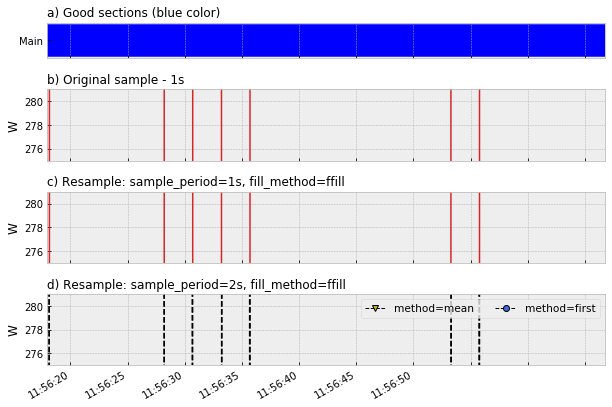

In [6]:
rcParams['figure.figsize'] = (10, 7)

#rcParams['figure.figsize'] = (25, 20)


ta = '2022-11-07 10:25:50+01:00' #tiempo inicial
tb = '2022-11-07 12:37:15+01:00' #tiempo final


#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)

ax1.minorticks_off()

ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
#ax1.annotate("|10:25:00 = 277 W", xy=('2022-11-23 10:25:00+01:00', 277.6),rotation=7)

ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
#ax2.annotate("|10:25:00 = 277 W", xy=('2022-11-23 10:25:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)



#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')



#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass



## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [9]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-11-07 10:25:00", end="2022-11-07 11:25:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 11:25:00+01:00', empty=False)

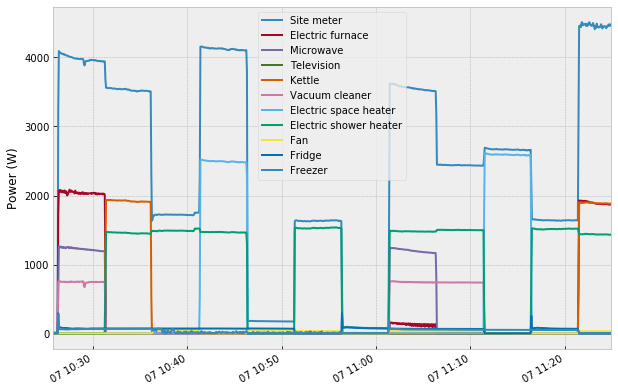

In [10]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [11]:
 #Validación 

valid = DataSet('dsual.h5')

valid.set_window(start="2022-11-07 11:25:00", end="2022-11-07 11:35:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-11-07 11:25:00+01:00', end='2022-11-07 11:35:00+01:00', empty=False)

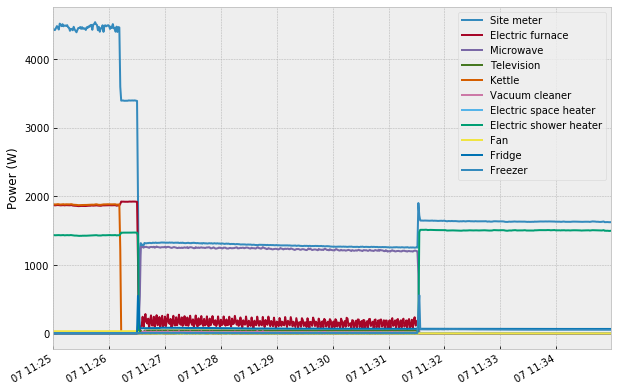

In [12]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [13]:
test = DataSet('dsual.h5') #Pruebas

test.set_window(start="2022-11-07 11:35:00", end="2022-11-07 12:37:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-11-07 11:35:00+01:00', end='2022-11-07 12:37:00+01:00', empty=False)

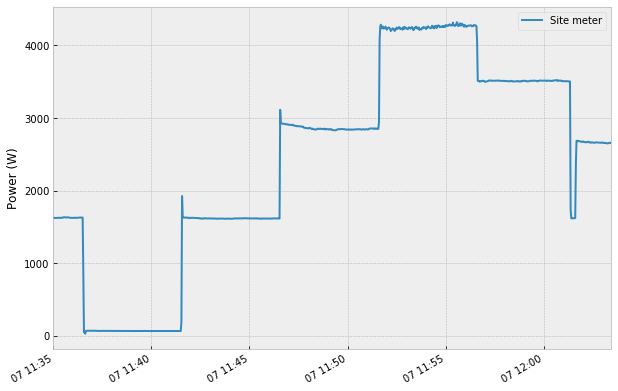

In [14]:
test_elec.mains().plot()